# **ECG**

In [2]:
import pandas as pd

import numpy as np
import wfdb
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
#pio.renderers.default = "colab"
import neurokit2 as nk
#pio.renderers.default = "browser"  # Abre o gráfico no navegador
# ou
#pio.renderers.default = "notebook"  # Usa o modo compatível com notebooks
# Configurar o tamanho da figura globalmente
plt.rcParams["figure.figsize"] = (16, 6)  # Ajuste a largura e altura aqui

# Definir o número máximo de linhas a serem exibidas
pd.set_option('display.max_rows', None)  # Exibe todas as linhas

In [3]:
# import pandas as pd
# import glob

# # Define o padrão para os arquivos CSV

# path = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\High-resolution_ECG\P0*'
# path_holter = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\Holter_ECG\P0*'

# #path = r'E:/Repositorio_Git/zzz-projeto_final/dados/ca-*.csv'


# # Usando glob para pegar todos os arquivos que seguem o padrão
# arquivos = glob.glob(path)
# arquivos_path_holter = glob.glob(path_holter)
# arquivos = [os.path.splitext(arquivo)[0] for arquivo in arquivos] # tirando as a extensões

# arquivos_path_holter = [os.path.splitext(arquivos_path_holter)[0] for arquivos_path_holter in arquivos_path_holter] # tirando as a extensões

In [4]:
import pandas as pd
import glob

# Define o padrão para os arquivos CSV

#path = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\High-resolution_ECG\P0*'
path = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\Holter_ECG\P0*'

#path = r'E:/Repositorio_Git/zzz-projeto_final/dados/ca-*.csv'


# Usando glob para pegar todos os arquivos que seguem o padrão
arquivos = glob.glob(path)
#arquivos_path_holter = glob.glob(path_holter)
arquivos = [os.path.splitext(arquivo)[0] for arquivo in arquivos] # tirando as a extensões

#arquivos_path_holter = [os.path.splitext(arquivos_path_holter)[0] for arquivos_path_holter in arquivos_path_holter] # tirando as a extensões

In [5]:
# #arquivos_path_holter

# record = wfdb.rdrecord(arquivos_path_holter[0])


# # Exibir as informações do arquivo
# print(record.__dict__)
#arquivos_path_holter

lista_sem_duplicatas = pd.Series(arquivos).unique().tolist() # removando duplicadas

In [6]:
lista_sem_duplicatas[4]

'D:\\Projeto_Tese_mestrado\\02_Dataset\\dados_ECG\\Holter_ECG\\P0005'

In [7]:
record = wfdb.rdrecord(lista_sem_duplicatas[0])




In [8]:
p_signal = record.p_signal
p_signal

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       ...,
       [-0.47, -0.47, -0.44],
       [-0.41, -0.36, -0.35],
       [-0.34, -0.29, -0.28]])

In [9]:
sinal_x = p_signal[:,0]
sinal_y = p_signal[:,1]
sinal_z = p_signal[:,2]

In [10]:
len(sinal_x)

16460600

In [11]:
# ecg_cleaned = nk.ecg_clean(sinal_x, sampling_rate=record.fs, method="neurokit")

In [12]:
# ecg_cleaned 

In [13]:
#quality = nk.ecg_quality(ecg_cleaned, sampling_rate=record.fs)
#nk.signal_plot([ecg_cleaned, quality], standardize=True)

In [14]:
#exg_dataframe = pd.DataFrame(ecg_cleaned, columns=['ECG_Clean'])

In [15]:
#exg_dataframe

In [16]:
#px.line(exg_dataframe[1000:2000], x=exg_dataframe.index[0:1000], y = 'ECG_Clean')

In [17]:
amostra = p_signal[0:300000,0]


In [18]:
#%%time
# para dados de ecg holder demora muito porque é muito grande
#ecg_x, _ = nk.ecg_process(amostra, sampling_rate= record.fs , method='neurokit') # Dividindo a tupla em DataFrame e Dicionário
#ecg_y, dict_info_y = nk.ecg_process(sinal_y, sampling_rate= record.fs , method='neurokit')
#ecg_z, dict_info_z = nk.ecg_process(sinal_z, sampling_rate= record.fs , method='neurokit')

In [19]:
# if (ecg_x['ECG_Clean'] < 0).any():
#     print("A coluna ECG_Clean contém valores negativos.")
# else:
#     print("A coluna ECG_Clean não contém valores negativos.")


1. 'ECG_R_Peaks'
- Descrição: Refere-se aos picos R do ECG, que são a parte mais alta da onda QRS.
Importância: O pico R é um dos eventos mais importantes no ECG, pois indica a despolarização dos ventrículos. É amplamente usado para calcular a frequência cardíaca e identificar batimentos.
2. 'ECG_P_Peaks'
- Descrição: Refere-se aos picos P, que estão associados à despolarização atrial.
Importância: O pico P representa a contração dos átrios do coração. Ele marca o início de cada batimento cardíaco.
3. 'ECG_P_Onsets'
- Descrição: Marca o início da onda P no ECG, ou seja, o começo da despolarização atrial.
Importância: Ajuda a identificar a transição do atividade atrial para o início da contração ventricular.
4. 'ECG_P_Offsets'
- Descrição: Marca o final da onda P no ECG, ou seja, o término da despolarização atrial.
Importância: Indica quando a atividade atrial termina, permitindo a análise do ciclo atrial e ventricular.
5. 'ECG_Q_Peaks'
- Descrição: Refere-se aos picos Q, que são uma parte da onda QRS.
Importância: O pico Q representa a despolarização do septo interventricular. Ele pode ser pequeno ou até ausente em algumas pessoas.
6. 'ECG_R_Onsets'
- Descrição: Marca o início do pico R, ou seja, o início da despolarização ventricular.
Importância: Esse valor ajuda a identificar o momento exato do começo da contração ventricular.
7. 'ECG_R_Offsets'
- Descrição: Marca o fim do pico R, ou seja, quando a despolarização ventricular está terminando.
Importância: Indica o ponto de transição entre a despolarização e a repolarização ventricular.
8. 'ECG_S_Peaks'
- Descrição: Refere-se aos picos S, que estão associados ao final da onda QRS.
Importância: O pico S representa a parte final da despolarização ventricular, quando a células cardíacas estão quase totalmente despolarizadas.
9. 'ECG_T_Peaks'
- Descrição: Refere-se ao pico T, que está associado à repolarização dos ventrículos.
Importância: O pico T indica a recuperação das células ventriculares após a contração, preparando o coração para o próximo batimento.
10. 'ECG_T_Onsets'
- Descrição: Marca o início da onda T, ou seja, o início da repolarização ventricular.
Importância: Esse ponto é importante para calcular a duração da repolarização ventricular, que pode ser usado para avaliar a saúde cardíaca.
11. 'ECG_T_Offsets'
- Descrição: Marca o final da onda T, indicando quando a repolarização ventricular está concluída.
Importância: Esse ponto é útil para analisar a duração da onda T, o que pode ser importante para detectar arritmias.
12. 'ECG_Phase_Atrial'
- Descrição: Refere-se a uma fase atrial do ECG, provavelmente a fase de despolarização ou repolarização dos átrios.
Importância: Pode indicar um marcador da atividade elétrica atrial, o que é útil para análise de arritmias atriais.
13. 'ECG_Phase_Completion_Atrial'
- Descrição: Marca o término da fase atrial, provavelmente indicando quando a atividade elétrica atrial termina.
Importância: Esse evento pode ser útil para identificar a transição entre a atividade atrial e ventricular.
14. 'ECG_Phase_Ventricular'
- Descrição: Refere-se à fase ventricular do ECG, provavelmente relacionada à despolarização ou repolarização dos ventrículos.
Importância: Essencial para a análise da atividade elétrica ventricular e para detectar possíveis problemas cardíacos.
15. 'ECG_Phase_Completion_Ventricular'
- Descrição: Marca o término da fase ventricular, ou seja, o fim da atividade elétrica ventricular.
Importância: Indica a transição entre a repolarização ventricular e o início de um novo ciclo de contração atrial.


## Irei testar Redes neurais com valores binarios do Neurokit 

In [20]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

dados = pd.read_csv(link_csv)

In [21]:
dados.head()

,Patient ID,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),...,Angiotensin-II receptor blocker (yes=1),Anticoagulants/antitrombotics (yes=1),Betablockers (yes=1),Digoxin (yes=1),Loop diuretics (yes=1),Spironolactone (yes=1),Statins (yes=1),Hidralazina (yes=1),ACE inhibitor (yes=1),Nitrovasodilator (yes=1)
0,P0001,2065,1460,0.0,0,0,0,58,1,83,...,0,1,1,1,1,0,0,0,1,0
1,P0002,2045,1460,0.0,0,0,0,58,1,74,...,1,1,1,0,0,0,1,0,0,0
2,P0003,2044,1460,0.0,0,0,0,69,1,83,...,1,1,1,1,1,0,0,0,0,0
3,P0004,2044,1460,0.0,0,0,0,56,0,84,...,1,1,1,0,1,1,0,0,0,0
4,P0005,2043,1460,0.0,0,0,0,70,1,97,...,0,1,1,0,1,0,1,0,1,1


In [22]:
# Contagem de classes no conjunto de dados
class_counts = dados['Cause of death'].value_counts()


# Contagem de classes no conjunto de dados
for class_label, count in class_counts.items():
    print(f'Classe {class_label}: {count} -> {count/dados.shape[0]*100:.2f}%')



Classe 0: 726 -> 73.19%
Classe 6: 100 -> 10.08%
Classe 3: 94 -> 9.48%
Classe 1: 61 -> 6.15%
Classe 7: 11 -> 1.11%


In [23]:
print(f'Quantidade de colunas: {dados.shape[1]}')
print(f'Quantidade de linhas: {dados.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [24]:
pd.unique(dados['Exit of the study'])

array([0., 3., 1., 2.])

In [25]:
#arquivos_path_holter

lista_sem_duplicatas = pd.Series(arquivos).unique().tolist() # removando duplicadas

In [26]:
len(lista_sem_duplicatas)

911

In [27]:
# Criando um DataFrame dos endereços
df_enderecos = pd.DataFrame({
    "Endereço": lista_sem_duplicatas
})

# Extraindo o Patient ID do final do endereço
df_enderecos["Patient ID"] = df_enderecos["Endereço"].apply(lambda x: x.split("\\")[-1])


# Removendo o sufixo '_H' da coluna 'Patient ID'
df_enderecos['Patient ID'] = df_enderecos['Patient ID'].str.replace('_H', '', regex=False)

# Aqui contem dados de duas colunas a primeira coluna vou usar como chave id para conectar os pacientes de cada scg e a segunda o tipo de morte.
novos_dados = dados[['Patient ID','Cause of death']]

# Fazendo a fusão (merge) dos DataFrames com base no "Patient ID"
df_final = df_enderecos.merge(novos_dados, on="Patient ID", how="left")
print(f'Sem o filtro de tipo de mortes {df_final.shape}')

df_final = df_final[~df_final['Cause of death'].isin([1])] # tirando valores que tem 1 pois significa mortes não identificada ou seja ruídos,

print(f'Com o filtro de tipo de mortes {df_final.shape}')

# Contagem de classes no conjunto de dados
class_counts = df_final['Cause of death'].value_counts()


# Contagem de classes no conjunto de dados
for class_label, count in class_counts.items():
    print(f'Classe {class_label}: {count} -> {count/df_final.shape[0]*100:.2f}%')
    
    
# Resetando o índice para garantir que o loop use os índices corretos
df_final.reset_index(drop=True, inplace=True)

Sem o filtro de tipo de mortes (911, 3)
Com o filtro de tipo de mortes (854, 3)
Classe 0: 662 -> 77.52%
Classe 6: 95 -> 11.12%
Classe 3: 86 -> 10.07%
Classe 7: 11 -> 1.29%


In [28]:
# # Lista para armazenar informações de cada paciente
# dados_pacientes = []

# # Loop para processar cada arquivo e pegar o tamanho do sinal
# for idx, arquivo in enumerate(arquivos):
#     try:
#         # Lendo o arquivo do ECG
#         record = wfdb.rdrecord(arquivo)
#         p_signal = record.p_signal
#         sinal_x = p_signal[:, 0]
        
#         # Armazenando as informações no dicionário
#         dados_pacientes.append({
#             "Paciente": arquivo.split("\\")[-1],  # Extrair o nome do paciente
#             "Quantidade de amostras": len(sinal_x)
#         })

#     except Exception as e:
#         print(f"Erro ao processar {arquivo}: {e}")

# # Convertendo a lista para um DataFrame
# df_pacientes = pd.DataFrame(dados_pacientes)

# # Exibindo as primeiras linhas do DataFrame
# print(df_pacientes)

# df_pacientes['Quantidade de amostras'].unique()

In [29]:
# hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
# hrv_time

## Cálculos para diferentes durações de sinal ECG

### 1. Para 5 minutos de sinal:
1. **Número de segundos em 5 minutos**:  
   5 minutos = 5 * 60 = 300 segundos.

2. **Número de amostras em 5 minutos**:  
   Como há 1.000 amostras por segundo, em 300 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 300 = 300.000 \, \text{amostras}.
   \]

Portanto, **5 minutos de sinal** corresponderiam a **300.000 amostras**.

---

### 2. Para 10 minutos de sinal:
1. **Número de segundos em 10 minutos**:  
   10 minutos = 10 * 60 = 600 segundos.

2. **Número de amostras em 10 minutos**:  
   Como há 1.000 amostras por segundo, em 600 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 600 = 600.000 \, \text{amostras}.
   \]

Portanto, **10 minutos de sinal** corresponderiam a **600.000 amostras**.

---

### 3. Para 15 minutos de sinal:
1. **Número de segundos em 15 minutos**:  
   15 minutos = 15 * 60 = 900 segundos.

2. **Número de amostras em 15 minutos**:  
   Como há 1.000 amostras por segundo, em 900 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 900 = 900.000 \, \text{amostras}.
   \]

Portanto, **15 minutos de sinal** corresponderiam a **900.000 amostras**.

---

### 4. Para 20 minutos de sinal:
1. **Número de segundos em 20 minutos**:  
   20 minutos = 20 * 60 = 1.200 segundos.

2. **Número de amostras em 20 minutos**:  
   Como há 1.000 amostras por segundo, em 1.200 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 1.200 = 1.200.000 \, \text{amostras}.
   \]

Portanto, **20 minutos de sinal** corresponderiam a **1.200.000 amostras**.

---
Vou desconsiderar por enquanto primeiro vou usar o ECG com resolução otima, ela tem 20 minutos no total
### 5. Para 25 minutos de sinal:
1. **Número de segundos em 25 minutos**:  
   25 minutos = 25 * 60 = 1.500 segundos.

2. **Número de amostras em 25 minutos**:  
   Como há 1.000 amostras por segundo, em 1.500 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 1.500 = 1.500.000 \, \text{amostras}.
   \]

Portanto, **25 minutos de sinal** corresponderiam a **1.500.000 amostras**.


## Agora vou testar usando o X

In [30]:
import duckdb
import pandas as pd
import numpy as np
import time
import wfdb
import neurokit2 as nk

# Conectar ao banco de dados DuckDB
conn = duckdb.connect(r"D:\Projeto_Tese_mestrado\02_Dataset\Duckedb\Holter_ECG\5minutos\banco_ecg.duckdb")

# Carregar apenas a lista de pacientes
pacientes = conn.execute("SELECT DISTINCT id_paciente FROM ecg_pacientes ORDER BY id_paciente").fetchdf()

# Lista de colunas que indicam eventos no ECG
colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

# Função para calcular estatísticas
def calcular_estatisticas(ondas):
    if ondas.empty:  
        return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
    # Substituir valores NaN por zero antes de calcular as estatísticas
    ondas = ondas.fillna(0)
    
    estatisticas = {
        "mean": ondas.mean(),
        "std": ondas.std(),
        "max": ondas.max(),
        "min": ondas.min(),
        "25%": ondas.quantile(0.25),
        "50%": ondas.quantile(0.50),
        "75%": ondas.quantile(0.75)
    }
    
    return estatisticas

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()


# Filtrar os pacientes que estão no df_filtro
pacientes_filtrados = pacientes[pacientes['id_paciente'].isin(df_final['Patient ID'])]

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()

for idx, paciente in enumerate(pacientes_filtrados["id_paciente"]):
    try:
        inicio_paciente = time.time()
        print(f"✅ Processando paciente {idx+1}/{len(pacientes_filtrados)}: {paciente}")

        # Carregar os dados do paciente diretamente do banco
        df_paciente = conn.execute(f"""
            SELECT sinal_x FROM ecg_pacientes
            WHERE id_paciente = '{paciente}'
        """).fetchdf()

        # Se não houver dados, pula o paciente
        if df_paciente.empty:
            print(f"⚠️ Nenhum dado encontrado para o paciente {paciente}. Pulando...")
            continue

        sinal_x = df_paciente["sinal_x"].values

        # Processar com Neurokit2
        ecg_x, _ = nk.ecg_process(sinal_x, sampling_rate=1000, method='biosppy')  # auteração de limpeza dos dados de ecg

        # Criar dicionário para armazenar estatísticas
        estatisticas_paciente = {}

        for coluna in colunas:
            if coluna not in ecg_x.columns:
                print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
                continue 

            ondas = ecg_x.loc[ecg_x[coluna] == 1, 'ECG_Clean']
            estatisticas = calcular_estatisticas(ondas)

            for stat, valor in estatisticas.items():
                estatisticas_paciente[f"{coluna}_{stat}"] = valor

        # Adicionando o target do paciente
        estatisticas_paciente["target"] = df_final.loc[df_final["Patient ID"] == paciente, "Cause of death"].values[0]

        # Adicionar ID do paciente
        estatisticas_paciente["id_paciente"] = paciente

        # Salvar os dados processados
        dados_processados.append(estatisticas_paciente)

        # Liberar memória
        del sinal_x, ecg_x, df_paciente

        print(f"✅ Paciente {paciente} processado com sucesso!")

    except Exception as e:
        print(f"❌ Erro ao processar paciente {paciente}: {e}")
        continue

# Fechar a conexão com o banco
conn.close()

# Criar DataFrame com os resultados
df_estatisticas_final = pd.DataFrame(dados_processados)
df_estatisticas_final.fillna(0, inplace=True)

# Salvar os resultados
df_estatisticas_final.to_csv(r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_x_biosppy.csv", index=False)

# Tempo total de execução
fim_geral = time.time()
print(f"🏁 Processamento concluído! Tempo total: {fim_geral - inicio_geral:.2f} segundos")


✅ Processando paciente 1/817: P0001
❌ Erro ao processar paciente P0001: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 2/817: P0002
❌ Erro ao processar paciente P0002: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 3/817: P0003
❌ Erro ao processar paciente P0003: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 4/817: P0004
❌ Erro ao processar paciente P0004: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 5/817: P0005
❌ Erro ao processar paciente P0005: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 6/817: P0006
❌ Erro ao processar paciente P0006: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 7/817: P0007
❌ Erro ao processar paciente P0007: NeuroKit error: ecg_findpeaks(): 'biosppy' not implemented.
✅ Processando paciente 8/817: P0008
❌ Erro ao processar paciente P0008: Neur

KeyboardInterrupt: 

In [35]:
# # Contar o número de pacientes distintos no banco DuckDB
# num_pacientes_distintos = conn.execute("SELECT COUNT(DISTINCT id_paciente) FROM ecg_pacientes").fetchone()[0]

# # Exibir a quantidade de pacientes distintos
# print(f"Quantidade de pacientes distintos no banco: {num_pacientes_distintos}")


In [15]:
# salvando o dataframe
#df_ecg_final.to_csv("dados_ecg.csv", index=False)


In [16]:
#df_estatisticas.shape

In [17]:
#df_estatisticas.head()

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


def tratamento_dados(dados, filtro):
    """
    Função para tratar os dados, filtrando colunas específicas e realizando pré-processamento.

    Parâmetros:
    - dados (DataFrame): O dataset a ser tratado.
    - filtro (str): Palavra-chave para selecionar as colunas (default: "ECG_R_Peaks").

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Filtrar colunas que contêm a palavra-chave no nome
    colunas_filtradas = dados.filter(like=filtro).columns
    X = dados[colunas_filtradas].values  # Apenas colunas filtradas

    # Garantir que o target seja separado corretamente
    y = dados['target'].values  

    # Transformar os rótulos usando LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Verificar o mapeamento dos rótulos
    print("Rótulos originais:", np.unique(y))
    print("Rótulos transformados:", np.unique(y_encoded))

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter o target para one-hot encoding se for multiclasse
    num_classes = len(np.unique(y_encoded))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    return X_train_scaled, X_test_scaled, y_train, y_test



Aumentando a Complexidade da Rede (Arquitetura)

Aumentando o Dropout de 0.3 para 0.5

Adicionando Regularização L2 (Penalização de Pesos)

Adotar a função de Ativação Leaky ReLU

 Reduzindo a Taxa de Aprendizado com ReduceLROnPlateau

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU

def construir_rede_neural(X_train, X_test, y_train, y_test,input_dim):
    # Criar modelo poderoso
    def criar_rede_neural(input_dim, num_classes):
        model = keras.Sequential([
        keras.Input(shape=(input_dim,)),  # Corrigindo a entrada
        Dense(512),
        LeakyReLU(negative_slope=0.1),  # Corrigindo o parâmetro alpha
        BatchNormalization(),
        Dropout(0.3),

        Dense(256),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])



        # Compilar modelo
        model.compile(
            optimizer=Adam(learning_rate=0.001),  # Adam já é otimizado para deep learning
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model

    # Criar callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10)


    # Criar e treinar o modelo
    modelo = criar_rede_neural(input_dim=input_dim, num_classes=4)
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # Define para 0 para ocultar a saída
        #verbose=2  # Apenas mostra os valores das métricas
    )

    # Avaliação
    loss, acc = modelo.evaluate(X_test, y_test)
    print(f"\nAcurácia no conjunto de validação: {acc:.4f}")


In [ ]:
link =r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG/dados_ecg_x_biosppy.csv"
df_x = pd.read_csv(link)

In [13]:
df_x.head()

,ECG_R_Peaks_mean,ECG_R_Peaks_std,ECG_R_Peaks_max,ECG_R_Peaks_min,ECG_R_Peaks_25%,ECG_R_Peaks_50%,ECG_R_Peaks_75%,ECG_P_Peaks_mean,ECG_P_Peaks_std,ECG_P_Peaks_max,...,ECG_Phase_Ventricular_75%,ECG_Phase_Completion_Ventricular_mean,ECG_Phase_Completion_Ventricular_std,ECG_Phase_Completion_Ventricular_max,ECG_Phase_Completion_Ventricular_min,ECG_Phase_Completion_Ventricular_25%,ECG_Phase_Completion_Ventricular_50%,ECG_Phase_Completion_Ventricular_75%,target,id_paciente
0,0.099249,0.153388,1.046051,-0.180410,0.027054,0.072548,0.122485,0.084649,0.131033,1.044284,...,0.055669,0.042187,0.134494,1.045010,-0.264870,-0.034502,0.026518,0.091533,0,P0001
1,0.511105,0.319255,0.671096,-0.359814,0.642707,0.648571,0.651661,0.166804,0.210045,0.315328,...,0.051762,-0.261902,0.265298,0.077356,-0.583623,-0.378640,-0.361271,-0.063332,0,P0002
2,0.257180,0.302417,1.750677,-0.175264,0.013436,0.237071,0.366684,0.282122,0.224757,2.194688,...,0.088446,0.094136,0.274647,1.749503,-0.486986,-0.083184,-0.020290,0.239964,0,P0003
3,0.159816,0.116467,0.671647,-0.259659,0.124996,0.147762,0.176144,0.022476,0.044302,0.282004,...,0.030916,0.065918,0.095172,0.496704,-0.252831,-0.016664,0.017638,0.147134,0,P0004
4,0.860841,0.518672,6.562620,-0.682371,0.807370,0.871342,0.946615,-0.004394,0.367115,2.116445,...,0.078261,0.348914,0.761426,6.562336,-2.138209,-0.171167,-0.071232,0.882566,0,P0005


In [61]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_x, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7497 - loss: 0.8031

Acurácia no conjunto de validação: 0.7683
Finalizando o processo - Tempo de execução: 33.92 segundos
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7617 - loss: 0.8188

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 27.00 segundos
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7617 - loss: 0.7814

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 20.64 segundos
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7617 - loss: 0.7289

Acurácia no conjunto de validação: 0.7744
Finalizando o proces

## Agora vou testar usando o Y

In [33]:
import duckdb
import pandas as pd
import numpy as np
import time
import wfdb
import neurokit2 as nk

# Conectar ao banco de dados DuckDB
conn = duckdb.connect(r"D:\Projeto_Tese_mestrado\02_Dataset\Duckedb\Holter_ECG\5minutos\banco_ecg.duckdb")

# Carregar apenas a lista de pacientes
pacientes = conn.execute("SELECT DISTINCT id_paciente FROM ecg_pacientes ORDER BY id_paciente").fetchdf()

# Lista de colunas que indicam eventos no ECG
colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

# Função para calcular estatísticas
def calcular_estatisticas(ondas):
    if ondas.empty:  
        return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
    # Substituir valores NaN por zero antes de calcular as estatísticas
    ondas = ondas.fillna(0)

    # Evitar divisão por zero substituindo valores muito pequenos
    ondas[ondas == 0] = 1e-6
    
    estatisticas = {
        "mean": ondas.mean(),
        "std": ondas.std(),
        "max": ondas.max(),
        "min": ondas.min(),
        "25%": ondas.quantile(0.25),
        "50%": ondas.quantile(0.50),
        "75%": ondas.quantile(0.75)
    }
    
    return estatisticas

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()


# Filtrar os pacientes que estão no df_filtro
pacientes_filtrados = pacientes[pacientes['id_paciente'].isin(df_final['Patient ID'])]

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()

for idx, paciente in enumerate(pacientes_filtrados["id_paciente"]):
    try:
        inicio_paciente = time.time()
        print(f"✅ Processando paciente {idx+1}/{len(pacientes_filtrados)}: {paciente}")

        # Carregar os dados do paciente diretamente do banco
        df_paciente = conn.execute(f"""
            SELECT sinal_y FROM ecg_pacientes
            WHERE id_paciente = '{paciente}'
        """).fetchdf()

        # Se não houver dados, pula o paciente
        if df_paciente.empty:
            print(f"⚠️ Nenhum dado encontrado para o paciente {paciente}. Pulando...")
            continue

        sinal_y = df_paciente["sinal_y"].values

        # Processar com Neurokit2
        ecg_y, _ = nk.ecg_process(sinal_y, sampling_rate=1000, method='neurokit') 

        # Criar dicionário para armazenar estatísticas
        estatisticas_paciente = {}

        for coluna in colunas:
            if coluna not in ecg_y.columns:
                print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
                continue 

            ondas = ecg_y.loc[ecg_y[coluna] == 1, 'ECG_Clean']
            estatisticas = calcular_estatisticas(ondas)

            for stat, valor in estatisticas.items():
                estatisticas_paciente[f"{coluna}_{stat}"] = valor

        # Adicionando o target do paciente
        estatisticas_paciente["target"] = df_final.loc[df_final["Patient ID"] == paciente, "Cause of death"].values[0]

        # Adicionar ID do paciente
        estatisticas_paciente["id_paciente"] = paciente

        # Salvar os dados processados
        dados_processados.append(estatisticas_paciente)

        # Liberar memória
        del sinal_y, ecg_y, df_paciente

        print(f"✅ Paciente {paciente} processado com sucesso!")

    except Exception as e:
        print(f"❌ Erro ao processar paciente {paciente}: {e}")
        continue

# Fechar a conexão com o banco
conn.close()

# Criar DataFrame com os resultados
df_estatisticas_final = pd.DataFrame(dados_processados)

# Substituir valores infinitos por um valor pequeno
df_estatisticas_final.replace([np.inf, -np.inf], 1e-6, inplace=True)

# Substituir NaN por zero
df_estatisticas_final.fillna(0, inplace=True)

# Salvar os resultados
df_estatisticas_final.to_csv(r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECGdados_ecg_y.csv", index=False)

# Tempo total de execução
fim_geral = time.time()
print(f"🏁 Processamento concluído! Tempo total: {fim_geral - inicio_geral:.2f} segundos")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

✅ Processando paciente 1/817: P0001
✅ Paciente P0001 processado com sucesso!
✅ Processando paciente 2/817: P0002
✅ Paciente P0002 processado com sucesso!
✅ Processando paciente 3/817: P0003
✅ Paciente P0003 processado com sucesso!
✅ Processando paciente 4/817: P0004
✅ Paciente P0004 processado com sucesso!
✅ Processando paciente 5/817: P0005
✅ Paciente P0005 processado com sucesso!
✅ Processando paciente 6/817: P0006
✅ Paciente P0006 processado com sucesso!
✅ Processando paciente 7/817: P0007
✅ Paciente P0007 processado com sucesso!
✅ Processando paciente 8/817: P0008
✅ Paciente P0008 processado com sucesso!
✅ Processando paciente 9/817: P0009
✅ Paciente P0009 processado com sucesso!
✅ Processando paciente 10/817: P0010
✅ Paciente P0010 processado com sucesso!
✅ Processando paciente 11/817: P0011
✅ Paciente P0011 processado com sucesso!
✅ Processando paciente 12/817: P0012
✅ Paciente P0012 processado com sucesso!
✅ Processando paciente 13/817: P0013
✅ Paciente P0013 processado com suce

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0060 processado com sucesso!
✅ Processando paciente 57/817: P0061
✅ Paciente P0061 processado com sucesso!
✅ Processando paciente 58/817: P0062
✅ Paciente P0062 processado com sucesso!
✅ Processando paciente 59/817: P0063
✅ Paciente P0063 processado com sucesso!
✅ Processando paciente 60/817: P0064
✅ Paciente P0064 processado com sucesso!
✅ Processando paciente 61/817: P0065
✅ Paciente P0065 processado com sucesso!
✅ Processando paciente 62/817: P0066
✅ Paciente P0066 processado com sucesso!
✅ Processando paciente 63/817: P0067
✅ Paciente P0067 processado com sucesso!
✅ Processando paciente 64/817: P0068
✅ Paciente P0068 processado com sucesso!
✅ Processando paciente 65/817: P0071
✅ Paciente P0071 processado com sucesso!
✅ Processando paciente 66/817: P0072
✅ Paciente P0072 processado com sucesso!
✅ Processando paciente 67/817: P0073
✅ Paciente P0073 processado com sucesso!
✅ Processando paciente 68/817: P0074
✅ Paciente P0074 processado com sucesso!
✅ Processando paciente 

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0094 processado com sucesso!
✅ Processando paciente 86/817: P0095
✅ Paciente P0095 processado com sucesso!
✅ Processando paciente 87/817: P0096
✅ Paciente P0096 processado com sucesso!
✅ Processando paciente 88/817: P0097
✅ Paciente P0097 processado com sucesso!
✅ Processando paciente 89/817: P0098
✅ Paciente P0098 processado com sucesso!
✅ Processando paciente 90/817: P0099
✅ Paciente P0099 processado com sucesso!
✅ Processando paciente 91/817: P0100
✅ Paciente P0100 processado com sucesso!
✅ Processando paciente 92/817: P0101
✅ Paciente P0101 processado com sucesso!
✅ Processando paciente 93/817: P0102
✅ Paciente P0102 processado com sucesso!
✅ Processando paciente 94/817: P0103
✅ Paciente P0103 processado com sucesso!
✅ Processando paciente 95/817: P0104
✅ Paciente P0104 processado com sucesso!
✅ Processando paciente 96/817: P0105
✅ Paciente P0105 processado com sucesso!
✅ Processando paciente 97/817: P0106
✅ Paciente P0106 processado com sucesso!
✅ Processando paciente 

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0135 processado com sucesso!
✅ Processando paciente 122/817: P0136
✅ Paciente P0136 processado com sucesso!
✅ Processando paciente 123/817: P0137
✅ Paciente P0137 processado com sucesso!
✅ Processando paciente 124/817: P0138
✅ Paciente P0138 processado com sucesso!
✅ Processando paciente 125/817: P0139
✅ Paciente P0139 processado com sucesso!
✅ Processando paciente 126/817: P0141
✅ Paciente P0141 processado com sucesso!
✅ Processando paciente 127/817: P0142


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0142 processado com sucesso!
✅ Processando paciente 128/817: P0143
✅ Paciente P0143 processado com sucesso!
✅ Processando paciente 129/817: P0145
✅ Paciente P0145 processado com sucesso!
✅ Processando paciente 130/817: P0146
✅ Paciente P0146 processado com sucesso!
✅ Processando paciente 131/817: P0147
✅ Paciente P0147 processado com sucesso!
✅ Processando paciente 132/817: P0148
✅ Paciente P0148 processado com sucesso!
✅ Processando paciente 133/817: P0150
✅ Paciente P0150 processado com sucesso!
✅ Processando paciente 134/817: P0151
✅ Paciente P0151 processado com sucesso!
✅ Processando paciente 135/817: P0152
✅ Paciente P0152 processado com sucesso!
✅ Processando paciente 136/817: P0153
✅ Paciente P0153 processado com sucesso!
✅ Processando paciente 137/817: P0154
✅ Paciente P0154 processado com sucesso!
✅ Processando paciente 138/817: P0155
✅ Paciente P0155 processado com sucesso!
✅ Processando paciente 139/817: P0156
✅ Paciente P0156 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0319 processado com sucesso!
✅ Processando paciente 275/817: P0320
✅ Paciente P0320 processado com sucesso!
✅ Processando paciente 276/817: P0321
✅ Paciente P0321 processado com sucesso!
✅ Processando paciente 277/817: P0322
✅ Paciente P0322 processado com sucesso!
✅ Processando paciente 278/817: P0323
✅ Paciente P0323 processado com sucesso!
✅ Processando paciente 279/817: P0324
✅ Paciente P0324 processado com sucesso!
✅ Processando paciente 280/817: P0325
✅ Paciente P0325 processado com sucesso!
✅ Processando paciente 281/817: P0326
✅ Paciente P0326 processado com sucesso!
✅ Processando paciente 282/817: P0327


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0327 processado com sucesso!
✅ Processando paciente 283/817: P0328
✅ Paciente P0328 processado com sucesso!
✅ Processando paciente 284/817: P0329
✅ Paciente P0329 processado com sucesso!
✅ Processando paciente 285/817: P0330
✅ Paciente P0330 processado com sucesso!
✅ Processando paciente 286/817: P0331
✅ Paciente P0331 processado com sucesso!
✅ Processando paciente 287/817: P0332
✅ Paciente P0332 processado com sucesso!
✅ Processando paciente 288/817: P0334
✅ Paciente P0334 processado com sucesso!
✅ Processando paciente 289/817: P0335
✅ Paciente P0335 processado com sucesso!
✅ Processando paciente 290/817: P0336
✅ Paciente P0336 processado com sucesso!
✅ Processando paciente 291/817: P0337
✅ Paciente P0337 processado com sucesso!
✅ Processando paciente 292/817: P0338
✅ Paciente P0338 processado com sucesso!
✅ Processando paciente 293/817: P0339
✅ Paciente P0339 processado com sucesso!
✅ Processando paciente 294/817: P0340
✅ Paciente P0340 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0347 processado com sucesso!
✅ Processando paciente 301/817: P0348
✅ Paciente P0348 processado com sucesso!
✅ Processando paciente 302/817: P0349
✅ Paciente P0349 processado com sucesso!
✅ Processando paciente 303/817: P0350
✅ Paciente P0350 processado com sucesso!
✅ Processando paciente 304/817: P0351
✅ Paciente P0351 processado com sucesso!
✅ Processando paciente 305/817: P0352
✅ Paciente P0352 processado com sucesso!
✅ Processando paciente 306/817: P0353
✅ Paciente P0353 processado com sucesso!
✅ Processando paciente 307/817: P0354
✅ Paciente P0354 processado com sucesso!
✅ Processando paciente 308/817: P0355
✅ Paciente P0355 processado com sucesso!
✅ Processando paciente 309/817: P0356
✅ Paciente P0356 processado com sucesso!
✅ Processando paciente 310/817: P0357
✅ Paciente P0357 processado com sucesso!
✅ Processando paciente 311/817: P0358
✅ Paciente P0358 processado com sucesso!
✅ Processando paciente 312/817: P0359
✅ Paciente P0359 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0531 processado com sucesso!
✅ Processando paciente 437/817: P0532
✅ Paciente P0532 processado com sucesso!
✅ Processando paciente 438/817: P0533
✅ Paciente P0533 processado com sucesso!
✅ Processando paciente 439/817: P0534
✅ Paciente P0534 processado com sucesso!
✅ Processando paciente 440/817: P0537
✅ Paciente P0537 processado com sucesso!
✅ Processando paciente 441/817: P0538
✅ Paciente P0538 processado com sucesso!
✅ Processando paciente 442/817: P0539
✅ Paciente P0539 processado com sucesso!
✅ Processando paciente 443/817: P0540
✅ Paciente P0540 processado com sucesso!
✅ Processando paciente 444/817: P0541
✅ Paciente P0541 processado com sucesso!
✅ Processando paciente 445/817: P0542
✅ Paciente P0542 processado com sucesso!
✅ Processando paciente 446/817: P0543
✅ Paciente P0543 processado com sucesso!
✅ Processando paciente 447/817: P0544
✅ Paciente P0544 processado com sucesso!
✅ Processando paciente 448/817: P0545
✅ Paciente P0545 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0572 processado com sucesso!
✅ Processando paciente 469/817: P0573
✅ Paciente P0573 processado com sucesso!
✅ Processando paciente 470/817: P0574
✅ Paciente P0574 processado com sucesso!
✅ Processando paciente 471/817: P0575
✅ Paciente P0575 processado com sucesso!
✅ Processando paciente 472/817: P0577
✅ Paciente P0577 processado com sucesso!
✅ Processando paciente 473/817: P0578


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0578 processado com sucesso!
✅ Processando paciente 474/817: P0579
✅ Paciente P0579 processado com sucesso!
✅ Processando paciente 475/817: P0580
✅ Paciente P0580 processado com sucesso!
✅ Processando paciente 476/817: P0581
✅ Paciente P0581 processado com sucesso!
✅ Processando paciente 477/817: P0582
✅ Paciente P0582 processado com sucesso!
✅ Processando paciente 478/817: P0583
✅ Paciente P0583 processado com sucesso!
✅ Processando paciente 479/817: P0585
✅ Paciente P0585 processado com sucesso!
✅ Processando paciente 480/817: P0586
✅ Paciente P0586 processado com sucesso!
✅ Processando paciente 481/817: P0587
✅ Paciente P0587 processado com sucesso!
✅ Processando paciente 482/817: P0589
✅ Paciente P0589 processado com sucesso!
✅ Processando paciente 483/817: P0590
✅ Paciente P0590 processado com sucesso!
✅ Processando paciente 484/817: P0591
✅ Paciente P0591 processado com sucesso!
✅ Processando paciente 485/817: P0593
✅ Paciente P0593 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0598 processado com sucesso!
✅ Processando paciente 490/817: P0599
✅ Paciente P0599 processado com sucesso!
✅ Processando paciente 491/817: P0600
✅ Paciente P0600 processado com sucesso!
✅ Processando paciente 492/817: P0601
✅ Paciente P0601 processado com sucesso!
✅ Processando paciente 493/817: P0602
✅ Paciente P0602 processado com sucesso!
✅ Processando paciente 494/817: P0603
✅ Paciente P0603 processado com sucesso!
✅ Processando paciente 495/817: P0604
✅ Paciente P0604 processado com sucesso!
✅ Processando paciente 496/817: P0606
✅ Paciente P0606 processado com sucesso!
✅ Processando paciente 497/817: P0608
✅ Paciente P0608 processado com sucesso!
✅ Processando paciente 498/817: P0609
✅ Paciente P0609 processado com sucesso!
✅ Processando paciente 499/817: P0610
✅ Paciente P0610 processado com sucesso!
✅ Processando paciente 500/817: P0611
✅ Paciente P0611 processado com sucesso!
✅ Processando paciente 501/817: P0612
✅ Paciente P0612 processado com sucesso!
✅ Processan

In [35]:
link =r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_y.csv"
df_y = pd.read_csv(link)

In [43]:
df_y.head()

,ECG_R_Peaks_mean,ECG_R_Peaks_std,ECG_R_Peaks_max,ECG_R_Peaks_min,ECG_R_Peaks_25%,ECG_R_Peaks_50%,ECG_R_Peaks_75%,ECG_P_Peaks_mean,ECG_P_Peaks_std,ECG_P_Peaks_max,...,ECG_Phase_Ventricular_75%,ECG_Phase_Completion_Ventricular_mean,ECG_Phase_Completion_Ventricular_std,ECG_Phase_Completion_Ventricular_max,ECG_Phase_Completion_Ventricular_min,ECG_Phase_Completion_Ventricular_25%,ECG_Phase_Completion_Ventricular_50%,ECG_Phase_Completion_Ventricular_75%,target,id_paciente
0,0.096298,0.148766,1.044230,-0.171820,0.022870,0.076800,0.125223,0.084744,0.126698,1.042014,...,0.059290,0.044471,0.129785,1.043139,-0.183181,-0.034413,0.030368,0.093551,0,P0001
1,1.279584,2.704974,12.307557,-0.116394,0.644906,0.650141,0.663562,0.394118,1.773270,6.071220,...,0.107673,0.697556,2.220428,12.299508,-2.192843,-0.047429,0.369070,0.648096,0,P0002
2,0.211955,0.217272,0.967878,-0.299041,0.089405,0.172369,0.299992,0.209941,0.163899,0.681341,...,0.090507,0.071934,0.213864,0.967045,-0.433225,-0.089992,0.020860,0.179159,0,P0003
3,0.272270,0.146217,0.751235,-0.159169,0.274153,0.295634,0.311296,0.026033,0.051592,0.365632,...,0.023636,0.123351,0.157940,0.748795,-0.164818,-0.000495,0.020482,0.292065,0,P0004
4,1.496257,0.639058,1.958759,-0.969896,1.612202,1.744698,1.835722,0.104707,0.577931,1.906958,...,0.131831,0.246953,0.955982,1.938576,-0.919939,-0.386844,-0.349262,1.592684,0,P0005


In [45]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_y, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7617 - loss: 0.7652 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 11.42 segundos
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7579 - loss: 0.7671

Acurácia no conjunto de validação: 0.7683
Finalizando o processo - Tempo de execução: 11.56 segundos
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7617 - loss: 0.8196 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 11.97 segundos
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7617 - loss: 0.8222 

Acurácia no conjunto de validação: 0.7744
Finalizando o proces

## Agora vou testar usando o Z

In [56]:
import duckdb
import pandas as pd
import numpy as np
import time
import wfdb
import neurokit2 as nk

# Conectar ao banco de dados DuckDB
conn = duckdb.connect(r"D:\Projeto_Tese_mestrado\02_Dataset\Duckedb\Holter_ECG\5minutos\banco_ecg.duckdb")

# Carregar apenas a lista de pacientes
pacientes = conn.execute("SELECT DISTINCT id_paciente FROM ecg_pacientes ORDER BY id_paciente").fetchdf()

# Lista de colunas que indicam eventos no ECG
colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

# Função para calcular estatísticas
def calcular_estatisticas(ondas):
    if ondas.empty:  
        return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
    # Substituir valores NaN por zero antes de calcular as estatísticas
    ondas = ondas.fillna(0)

    # Evitar divisão por zero substituindo valores muito pequenos
    ondas[ondas == 0] = 1e-6
    
    estatisticas = {
        "mean": ondas.mean(),
        "std": ondas.std(),
        "max": ondas.max(),
        "min": ondas.min(),
        "25%": ondas.quantile(0.25),
        "50%": ondas.quantile(0.50),
        "75%": ondas.quantile(0.75)
    }
    
    return estatisticas

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()


# Filtrar os pacientes que estão no df_filtro
pacientes_filtrados = pacientes[pacientes['id_paciente'].isin(df_final['Patient ID'])]

# Processar paciente por paciente
dados_processados = []
inicio_geral = time.time()

for idx, paciente in enumerate(pacientes_filtrados["id_paciente"]):
    try:
        inicio_paciente = time.time()
        print(f"✅ Processando paciente {idx+1}/{len(pacientes_filtrados)}: {paciente}")

        # Carregar os dados do paciente diretamente do banco
        df_paciente = conn.execute(f"""
            SELECT sinal_z FROM ecg_pacientes
            WHERE id_paciente = '{paciente}'
        """).fetchdf()

        # Se não houver dados, pula o paciente
        if df_paciente.empty:
            print(f"⚠️ Nenhum dado encontrado para o paciente {paciente}. Pulando...")
            continue

        sinal_z = df_paciente["sinal_z"].values

        # Processar com Neurokit2
        ecg_z, _ = nk.ecg_process(sinal_z, sampling_rate=1000, method='neurokit') 

        # Criar dicionário para armazenar estatísticas
        estatisticas_paciente = {}

        for coluna in colunas:
            if coluna not in ecg_z.columns:
                print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
                continue 

            ondas = ecg_z.loc[ecg_z[coluna] == 1, 'ECG_Clean']
            estatisticas = calcular_estatisticas(ondas)

            for stat, valor in estatisticas.items():
                estatisticas_paciente[f"{coluna}_{stat}"] = valor

        # Adicionando o target do paciente
        estatisticas_paciente["target"] = df_final.loc[df_final["Patient ID"] == paciente, "Cause of death"].values[0]

        # Adicionar ID do paciente
        estatisticas_paciente["id_paciente"] = paciente

        # Salvar os dados processados
        dados_processados.append(estatisticas_paciente)

        # Liberar memória
        del sinal_z, ecg_z, df_paciente

        print(f"✅ Paciente {paciente} processado com sucesso!")

    except Exception as e:
        print(f"❌ Erro ao processar paciente {paciente}: {e}")
        continue

# Fechar a conexão com o banco
conn.close()

# Criar DataFrame com os resultados
df_estatisticas_final = pd.DataFrame(dados_processados)

# Substituir valores infinitos por um valor pequeno
df_estatisticas_final.replace([np.inf, -np.inf], 1e-6, inplace=True)

# Substituir NaN por zero
df_estatisticas_final.fillna(0, inplace=True)

# Salvar os resultados
df_estatisticas_final.to_csv(r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_z.csv", index=False)

# Tempo total de execução
fim_geral = time.time()
print(f"🏁 Processamento concluído! Tempo total: {fim_geral - inicio_geral:.2f} segundos")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

✅ Processando paciente 1/817: P0001
✅ Paciente P0001 processado com sucesso!
✅ Processando paciente 2/817: P0002
✅ Paciente P0002 processado com sucesso!
✅ Processando paciente 3/817: P0003
✅ Paciente P0003 processado com sucesso!
✅ Processando paciente 4/817: P0004
✅ Paciente P0004 processado com sucesso!
✅ Processando paciente 5/817: P0005
✅ Paciente P0005 processado com sucesso!
✅ Processando paciente 6/817: P0006
✅ Paciente P0006 processado com sucesso!
✅ Processando paciente 7/817: P0007
✅ Paciente P0007 processado com sucesso!
✅ Processando paciente 8/817: P0008
✅ Paciente P0008 processado com sucesso!
✅ Processando paciente 9/817: P0009
✅ Paciente P0009 processado com sucesso!
✅ Processando paciente 10/817: P0010
✅ Paciente P0010 processado com sucesso!
✅ Processando paciente 11/817: P0011
✅ Paciente P0011 processado com sucesso!
✅ Processando paciente 12/817: P0012
✅ Paciente P0012 processado com sucesso!
✅ Processando paciente 13/817: P0013
✅ Paciente P0013 processado com suce

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0090 processado com sucesso!
✅ Processando paciente 82/817: P0091


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0091 processado com sucesso!
✅ Processando paciente 83/817: P0092


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0092 processado com sucesso!
✅ Processando paciente 84/817: P0093
✅ Paciente P0093 processado com sucesso!
✅ Processando paciente 85/817: P0094
✅ Paciente P0094 processado com sucesso!
✅ Processando paciente 86/817: P0095
✅ Paciente P0095 processado com sucesso!
✅ Processando paciente 87/817: P0096
✅ Paciente P0096 processado com sucesso!
✅ Processando paciente 88/817: P0097
✅ Paciente P0097 processado com sucesso!
✅ Processando paciente 89/817: P0098
✅ Paciente P0098 processado com sucesso!
✅ Processando paciente 90/817: P0099


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0099 processado com sucesso!
✅ Processando paciente 91/817: P0100
✅ Paciente P0100 processado com sucesso!
✅ Processando paciente 92/817: P0101
✅ Paciente P0101 processado com sucesso!
✅ Processando paciente 93/817: P0102
✅ Paciente P0102 processado com sucesso!
✅ Processando paciente 94/817: P0103
✅ Paciente P0103 processado com sucesso!
✅ Processando paciente 95/817: P0104
✅ Paciente P0104 processado com sucesso!
✅ Processando paciente 96/817: P0105
✅ Paciente P0105 processado com sucesso!
✅ Processando paciente 97/817: P0106
✅ Paciente P0106 processado com sucesso!
✅ Processando paciente 98/817: P0107
✅ Paciente P0107 processado com sucesso!
✅ Processando paciente 99/817: P0108
✅ Paciente P0108 processado com sucesso!
✅ Processando paciente 100/817: P0110
✅ Paciente P0110 processado com sucesso!
✅ Processando paciente 101/817: P0111
✅ Paciente P0111 processado com sucesso!
✅ Processando paciente 102/817: P0112
✅ Paciente P0112 processado com sucesso!
✅ Processando pacien

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0135 processado com sucesso!
✅ Processando paciente 122/817: P0136
✅ Paciente P0136 processado com sucesso!
✅ Processando paciente 123/817: P0137
✅ Paciente P0137 processado com sucesso!
✅ Processando paciente 124/817: P0138


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0138 processado com sucesso!
✅ Processando paciente 125/817: P0139
✅ Paciente P0139 processado com sucesso!
✅ Processando paciente 126/817: P0141
✅ Paciente P0141 processado com sucesso!
✅ Processando paciente 127/817: P0142
✅ Paciente P0142 processado com sucesso!
✅ Processando paciente 128/817: P0143
✅ Paciente P0143 processado com sucesso!
✅ Processando paciente 129/817: P0145
✅ Paciente P0145 processado com sucesso!
✅ Processando paciente 130/817: P0146
✅ Paciente P0146 processado com sucesso!
✅ Processando paciente 131/817: P0147
✅ Paciente P0147 processado com sucesso!
✅ Processando paciente 132/817: P0148
✅ Paciente P0148 processado com sucesso!
✅ Processando paciente 133/817: P0150
✅ Paciente P0150 processado com sucesso!
✅ Processando paciente 134/817: P0151
✅ Paciente P0151 processado com sucesso!
✅ Processando paciente 135/817: P0152
✅ Paciente P0152 processado com sucesso!
✅ Processando paciente 136/817: P0153
✅ Paciente P0153 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0195 processado com sucesso!
✅ Processando paciente 174/817: P0196


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0196 processado com sucesso!
✅ Processando paciente 175/817: P0197
✅ Paciente P0197 processado com sucesso!
✅ Processando paciente 176/817: P0198
✅ Paciente P0198 processado com sucesso!
✅ Processando paciente 177/817: P0199
✅ Paciente P0199 processado com sucesso!
✅ Processando paciente 178/817: P0200
✅ Paciente P0200 processado com sucesso!
✅ Processando paciente 179/817: P0201
✅ Paciente P0201 processado com sucesso!
✅ Processando paciente 180/817: P0202
✅ Paciente P0202 processado com sucesso!
✅ Processando paciente 181/817: P0203
✅ Paciente P0203 processado com sucesso!
✅ Processando paciente 182/817: P0204
✅ Paciente P0204 processado com sucesso!
✅ Processando paciente 183/817: P0206
✅ Paciente P0206 processado com sucesso!
✅ Processando paciente 184/817: P0207
✅ Paciente P0207 processado com sucesso!
✅ Processando paciente 185/817: P0208
✅ Paciente P0208 processado com sucesso!
✅ Processando paciente 186/817: P0209
✅ Paciente P0209 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0234 processado com sucesso!
✅ Processando paciente 207/817: P0235
✅ Paciente P0235 processado com sucesso!
✅ Processando paciente 208/817: P0236
✅ Paciente P0236 processado com sucesso!
✅ Processando paciente 209/817: P0237
✅ Paciente P0237 processado com sucesso!
✅ Processando paciente 210/817: P0238
✅ Paciente P0238 processado com sucesso!
✅ Processando paciente 211/817: P0239
✅ Paciente P0239 processado com sucesso!
✅ Processando paciente 212/817: P0240
✅ Paciente P0240 processado com sucesso!
✅ Processando paciente 213/817: P0241
✅ Paciente P0241 processado com sucesso!
✅ Processando paciente 214/817: P0242
✅ Paciente P0242 processado com sucesso!
✅ Processando paciente 215/817: P0243
✅ Paciente P0243 processado com sucesso!
✅ Processando paciente 216/817: P0244
✅ Paciente P0244 processado com sucesso!
✅ Processando paciente 217/817: P0248
✅ Paciente P0248 processado com sucesso!
✅ Processando paciente 218/817: P0249
✅ Paciente P0249 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0252 processado com sucesso!
✅ Processando paciente 220/817: P0253
✅ Paciente P0253 processado com sucesso!
✅ Processando paciente 221/817: P0254
✅ Paciente P0254 processado com sucesso!
✅ Processando paciente 222/817: P0255
✅ Paciente P0255 processado com sucesso!
✅ Processando paciente 223/817: P0256
✅ Paciente P0256 processado com sucesso!
✅ Processando paciente 224/817: P0257
✅ Paciente P0257 processado com sucesso!
✅ Processando paciente 225/817: P0259
✅ Paciente P0259 processado com sucesso!
✅ Processando paciente 226/817: P0261
✅ Paciente P0261 processado com sucesso!
✅ Processando paciente 227/817: P0262
✅ Paciente P0262 processado com sucesso!
✅ Processando paciente 228/817: P0263
✅ Paciente P0263 processado com sucesso!
✅ Processando paciente 229/817: P0264
✅ Paciente P0264 processado com sucesso!
✅ Processando paciente 230/817: P0265
✅ Paciente P0265 processado com sucesso!
✅ Processando paciente 231/817: P0266
✅ Paciente P0266 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0319 processado com sucesso!
✅ Processando paciente 275/817: P0320
✅ Paciente P0320 processado com sucesso!
✅ Processando paciente 276/817: P0321
✅ Paciente P0321 processado com sucesso!
✅ Processando paciente 277/817: P0322
✅ Paciente P0322 processado com sucesso!
✅ Processando paciente 278/817: P0323
✅ Paciente P0323 processado com sucesso!
✅ Processando paciente 279/817: P0324
✅ Paciente P0324 processado com sucesso!
✅ Processando paciente 280/817: P0325
✅ Paciente P0325 processado com sucesso!
✅ Processando paciente 281/817: P0326
✅ Paciente P0326 processado com sucesso!
✅ Processando paciente 282/817: P0327
✅ Paciente P0327 processado com sucesso!
✅ Processando paciente 283/817: P0328
✅ Paciente P0328 processado com sucesso!
✅ Processando paciente 284/817: P0329
✅ Paciente P0329 processado com sucesso!
✅ Processando paciente 285/817: P0330
✅ Paciente P0330 processado com sucesso!
✅ Processando paciente 286/817: P0331
✅ Paciente P0331 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0347 processado com sucesso!
✅ Processando paciente 301/817: P0348


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0348 processado com sucesso!
✅ Processando paciente 302/817: P0349
✅ Paciente P0349 processado com sucesso!
✅ Processando paciente 303/817: P0350


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0350 processado com sucesso!
✅ Processando paciente 304/817: P0351
✅ Paciente P0351 processado com sucesso!
✅ Processando paciente 305/817: P0352
✅ Paciente P0352 processado com sucesso!
✅ Processando paciente 306/817: P0353
✅ Paciente P0353 processado com sucesso!
✅ Processando paciente 307/817: P0354
✅ Paciente P0354 processado com sucesso!
✅ Processando paciente 308/817: P0355
✅ Paciente P0355 processado com sucesso!
✅ Processando paciente 309/817: P0356
✅ Paciente P0356 processado com sucesso!
✅ Processando paciente 310/817: P0357


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0357 processado com sucesso!
✅ Processando paciente 311/817: P0358
✅ Paciente P0358 processado com sucesso!
✅ Processando paciente 312/817: P0359
✅ Paciente P0359 processado com sucesso!
✅ Processando paciente 313/817: P0360
✅ Paciente P0360 processado com sucesso!
✅ Processando paciente 314/817: P0361
✅ Paciente P0361 processado com sucesso!
✅ Processando paciente 315/817: P0363
✅ Paciente P0363 processado com sucesso!
✅ Processando paciente 316/817: P0364
✅ Paciente P0364 processado com sucesso!
✅ Processando paciente 317/817: P0365
✅ Paciente P0365 processado com sucesso!
✅ Processando paciente 318/817: P0366
✅ Paciente P0366 processado com sucesso!
✅ Processando paciente 319/817: P0367
✅ Paciente P0367 processado com sucesso!
✅ Processando paciente 320/817: P0371
✅ Paciente P0371 processado com sucesso!
✅ Processando paciente 321/817: P0372
✅ Paciente P0372 processado com sucesso!
✅ Processando paciente 322/817: P0373
✅ Paciente P0373 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0379 processado com sucesso!
✅ Processando paciente 328/817: P0380
✅ Paciente P0380 processado com sucesso!
✅ Processando paciente 329/817: P0381
✅ Paciente P0381 processado com sucesso!
✅ Processando paciente 330/817: P0382
✅ Paciente P0382 processado com sucesso!
✅ Processando paciente 331/817: P0386
✅ Paciente P0386 processado com sucesso!
✅ Processando paciente 332/817: P0387
✅ Paciente P0387 processado com sucesso!
✅ Processando paciente 333/817: P0388
✅ Paciente P0388 processado com sucesso!
✅ Processando paciente 334/817: P0389
✅ Paciente P0389 processado com sucesso!
✅ Processando paciente 335/817: P0391
✅ Paciente P0391 processado com sucesso!
✅ Processando paciente 336/817: P0392
✅ Paciente P0392 processado com sucesso!
✅ Processando paciente 337/817: P0395
✅ Paciente P0395 processado com sucesso!
✅ Processando paciente 338/817: P0398
✅ Paciente P0398 processado com sucesso!
✅ Processando paciente 339/817: P0399
✅ Paciente P0399 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0406 processado com sucesso!
✅ Processando paciente 346/817: P0407
✅ Paciente P0407 processado com sucesso!
✅ Processando paciente 347/817: P0408
✅ Paciente P0408 processado com sucesso!
✅ Processando paciente 348/817: P0409
✅ Paciente P0409 processado com sucesso!
✅ Processando paciente 349/817: P0411
✅ Paciente P0411 processado com sucesso!
✅ Processando paciente 350/817: P0412
✅ Paciente P0412 processado com sucesso!
✅ Processando paciente 351/817: P0413
✅ Paciente P0413 processado com sucesso!
✅ Processando paciente 352/817: P0414
✅ Paciente P0414 processado com sucesso!
✅ Processando paciente 353/817: P0415
✅ Paciente P0415 processado com sucesso!
✅ Processando paciente 354/817: P0416
✅ Paciente P0416 processado com sucesso!
✅ Processando paciente 355/817: P0417
✅ Paciente P0417 processado com sucesso!
✅ Processando paciente 356/817: P0419
✅ Paciente P0419 processado com sucesso!
✅ Processando paciente 357/817: P0420
✅ Paciente P0420 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0452 processado com sucesso!
✅ Processando paciente 375/817: P0453
✅ Paciente P0453 processado com sucesso!
✅ Processando paciente 376/817: P0454
✅ Paciente P0454 processado com sucesso!
✅ Processando paciente 377/817: P0455
✅ Paciente P0455 processado com sucesso!
✅ Processando paciente 378/817: P0456


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0456 processado com sucesso!
✅ Processando paciente 379/817: P0457
✅ Paciente P0457 processado com sucesso!
✅ Processando paciente 380/817: P0459
✅ Paciente P0459 processado com sucesso!
✅ Processando paciente 381/817: P0461
✅ Paciente P0461 processado com sucesso!
✅ Processando paciente 382/817: P0463
✅ Paciente P0463 processado com sucesso!
✅ Processando paciente 383/817: P0464
✅ Paciente P0464 processado com sucesso!
✅ Processando paciente 384/817: P0465
✅ Paciente P0465 processado com sucesso!
✅ Processando paciente 385/817: P0467
✅ Paciente P0467 processado com sucesso!
✅ Processando paciente 386/817: P0468
✅ Paciente P0468 processado com sucesso!
✅ Processando paciente 387/817: P0470
✅ Paciente P0470 processado com sucesso!
✅ Processando paciente 388/817: P0471
✅ Paciente P0471 processado com sucesso!
✅ Processando paciente 389/817: P0472
✅ Paciente P0472 processado com sucesso!
✅ Processando paciente 390/817: P0474


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0474 processado com sucesso!
✅ Processando paciente 391/817: P0475
✅ Paciente P0475 processado com sucesso!
✅ Processando paciente 392/817: P0476
✅ Paciente P0476 processado com sucesso!
✅ Processando paciente 393/817: P0478
✅ Paciente P0478 processado com sucesso!
✅ Processando paciente 394/817: P0479
✅ Paciente P0479 processado com sucesso!
✅ Processando paciente 395/817: P0480
✅ Paciente P0480 processado com sucesso!
✅ Processando paciente 396/817: P0481
✅ Paciente P0481 processado com sucesso!
✅ Processando paciente 397/817: P0482
✅ Paciente P0482 processado com sucesso!
✅ Processando paciente 398/817: P0484
✅ Paciente P0484 processado com sucesso!
✅ Processando paciente 399/817: P0485
✅ Paciente P0485 processado com sucesso!
✅ Processando paciente 400/817: P0486
✅ Paciente P0486 processado com sucesso!
✅ Processando paciente 401/817: P0487
✅ Paciente P0487 processado com sucesso!
✅ Processando paciente 402/817: P0488
✅ Paciente P0488 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0510 processado com sucesso!
✅ Processando paciente 416/817: P0511
✅ Paciente P0511 processado com sucesso!
✅ Processando paciente 417/817: P0512


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0512 processado com sucesso!
✅ Processando paciente 418/817: P0513
✅ Paciente P0513 processado com sucesso!
✅ Processando paciente 419/817: P0514
✅ Paciente P0514 processado com sucesso!
✅ Processando paciente 420/817: P0515


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0515 processado com sucesso!
✅ Processando paciente 421/817: P0516
✅ Paciente P0516 processado com sucesso!
✅ Processando paciente 422/817: P0517
✅ Paciente P0517 processado com sucesso!
✅ Processando paciente 423/817: P0518


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0518 processado com sucesso!
✅ Processando paciente 424/817: P0519
✅ Paciente P0519 processado com sucesso!
✅ Processando paciente 425/817: P0520
✅ Paciente P0520 processado com sucesso!
✅ Processando paciente 426/817: P0521
✅ Paciente P0521 processado com sucesso!
✅ Processando paciente 427/817: P0522


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0522 processado com sucesso!
✅ Processando paciente 428/817: P0523
✅ Paciente P0523 processado com sucesso!
✅ Processando paciente 429/817: P0524
✅ Paciente P0524 processado com sucesso!
✅ Processando paciente 430/817: P0525
✅ Paciente P0525 processado com sucesso!
✅ Processando paciente 431/817: P0526
✅ Paciente P0526 processado com sucesso!
✅ Processando paciente 432/817: P0527
✅ Paciente P0527 processado com sucesso!
✅ Processando paciente 433/817: P0528
✅ Paciente P0528 processado com sucesso!
✅ Processando paciente 434/817: P0529
✅ Paciente P0529 processado com sucesso!
✅ Processando paciente 435/817: P0530
✅ Paciente P0530 processado com sucesso!
✅ Processando paciente 436/817: P0531


C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0531 processado com sucesso!
✅ Processando paciente 437/817: P0532
✅ Paciente P0532 processado com sucesso!
✅ Processando paciente 438/817: P0533
✅ Paciente P0533 processado com sucesso!
✅ Processando paciente 439/817: P0534
✅ Paciente P0534 processado com sucesso!
✅ Processando paciente 440/817: P0537
✅ Paciente P0537 processado com sucesso!
✅ Processando paciente 441/817: P0538
✅ Paciente P0538 processado com sucesso!
✅ Processando paciente 442/817: P0539
✅ Paciente P0539 processado com sucesso!
✅ Processando paciente 443/817: P0540
✅ Paciente P0540 processado com sucesso!
✅ Processando paciente 444/817: P0541
✅ Paciente P0541 processado com sucesso!
✅ Processando paciente 445/817: P0542
✅ Paciente P0542 processado com sucesso!
✅ Processando paciente 446/817: P0543
✅ Paciente P0543 processado com sucesso!
✅ Processando paciente 447/817: P0544
✅ Paciente P0544 processado com sucesso!
✅ Processando paciente 448/817: P0545
✅ Paciente P0545 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0578 processado com sucesso!
✅ Processando paciente 474/817: P0579
✅ Paciente P0579 processado com sucesso!
✅ Processando paciente 475/817: P0580
✅ Paciente P0580 processado com sucesso!
✅ Processando paciente 476/817: P0581
✅ Paciente P0581 processado com sucesso!
✅ Processando paciente 477/817: P0582
✅ Paciente P0582 processado com sucesso!
✅ Processando paciente 478/817: P0583
✅ Paciente P0583 processado com sucesso!
✅ Processando paciente 479/817: P0585
✅ Paciente P0585 processado com sucesso!
✅ Processando paciente 480/817: P0586
✅ Paciente P0586 processado com sucesso!
✅ Processando paciente 481/817: P0587
✅ Paciente P0587 processado com sucesso!
✅ Processando paciente 482/817: P0589
✅ Paciente P0589 processado com sucesso!
✅ Processando paciente 483/817: P0590
✅ Paciente P0590 processado com sucesso!
✅ Processando paciente 484/817: P0591
✅ Paciente P0591 processado com sucesso!
✅ Processando paciente 485/817: P0593
✅ Paciente P0593 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0599 processado com sucesso!
✅ Processando paciente 491/817: P0600
✅ Paciente P0600 processado com sucesso!
✅ Processando paciente 492/817: P0601
✅ Paciente P0601 processado com sucesso!
✅ Processando paciente 493/817: P0602
✅ Paciente P0602 processado com sucesso!
✅ Processando paciente 494/817: P0603
✅ Paciente P0603 processado com sucesso!
✅ Processando paciente 495/817: P0604
✅ Paciente P0604 processado com sucesso!
✅ Processando paciente 496/817: P0606
✅ Paciente P0606 processado com sucesso!
✅ Processando paciente 497/817: P0608
✅ Paciente P0608 processado com sucesso!
✅ Processando paciente 498/817: P0609
✅ Paciente P0609 processado com sucesso!
✅ Processando paciente 499/817: P0610
✅ Paciente P0610 processado com sucesso!
✅ Processando paciente 500/817: P0611
✅ Paciente P0611 processado com sucesso!
✅ Processando paciente 501/817: P0612
✅ Paciente P0612 processado com sucesso!
✅ Processando paciente 502/817: P0613
✅ Paciente P0613 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0652 processado com sucesso!
✅ Processando paciente 540/817: P0653
✅ Paciente P0653 processado com sucesso!
✅ Processando paciente 541/817: P0654
✅ Paciente P0654 processado com sucesso!
✅ Processando paciente 542/817: P0655
✅ Paciente P0655 processado com sucesso!
✅ Processando paciente 543/817: P0656
✅ Paciente P0656 processado com sucesso!
✅ Processando paciente 544/817: P0657
✅ Paciente P0657 processado com sucesso!
✅ Processando paciente 545/817: P0658
✅ Paciente P0658 processado com sucesso!
✅ Processando paciente 546/817: P0659
✅ Paciente P0659 processado com sucesso!
✅ Processando paciente 547/817: P0660
✅ Paciente P0660 processado com sucesso!
✅ Processando paciente 548/817: P0662
✅ Paciente P0662 processado com sucesso!
✅ Processando paciente 549/817: P0663
✅ Paciente P0663 processado com sucesso!
✅ Processando paciente 550/817: P0664
✅ Paciente P0664 processado com sucesso!
✅ Processando paciente 551/817: P0666
✅ Paciente P0666 processado com sucesso!
✅ Processan

C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
C:\Users\NOTEBOOK\anaconda3\Lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


✅ Paciente P0672 processado com sucesso!
✅ Processando paciente 558/817: P0673
✅ Paciente P0673 processado com sucesso!
✅ Processando paciente 559/817: P0675
✅ Paciente P0675 processado com sucesso!
✅ Processando paciente 560/817: P0676
✅ Paciente P0676 processado com sucesso!
✅ Processando paciente 561/817: P0677
✅ Paciente P0677 processado com sucesso!
✅ Processando paciente 562/817: P0678
✅ Paciente P0678 processado com sucesso!
✅ Processando paciente 563/817: P0679
✅ Paciente P0679 processado com sucesso!
✅ Processando paciente 564/817: P0680
✅ Paciente P0680 processado com sucesso!
✅ Processando paciente 565/817: P0681
✅ Paciente P0681 processado com sucesso!
✅ Processando paciente 566/817: P0682
✅ Paciente P0682 processado com sucesso!
✅ Processando paciente 567/817: P0683
✅ Paciente P0683 processado com sucesso!
✅ Processando paciente 568/817: P0684
✅ Paciente P0684 processado com sucesso!
✅ Processando paciente 569/817: P0685
✅ Paciente P0685 processado com sucesso!
✅ Processan

In [39]:
link = r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_z.csv"
df_z = pd.read_csv(link)

In [62]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_z, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.7829 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 12.81 segundos
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.7675 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 11.96 segundos
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7617 - loss: 0.7546 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 14.54 segundos
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.8301 

Acurácia no conjunto de validação: 0.7744
Finalizando o proces

## Agora vou testar usando a Tabela

Testando somente a tabela dos pacientes sem usar o ECG para comparar com o ECG

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

def tratamento_dados(dados):
    """
    Função para tratar os dados, realizando pré-processamento sem filtro específico.

    Parâmetros:
    - dados (DataFrame): O dataset a ser tratado.

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Separar as features (X) e o target (y)
    X = dados.drop(columns=['target']).values  # Remove a coluna target e pega as features
    y = dados['target'].values  # Mantém apenas a coluna target

    # Transformar os rótulos usando LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Verificar o mapeamento dos rótulos
    print("Rótulos originais:", np.unique(y))
    print("Rótulos transformados:", np.unique(y_encoded))

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter o target para one-hot encoding se for multiclasse
    num_classes = len(np.unique(y_encoded))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


In [22]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

dados = pd.read_csv(link_csv)

In [23]:

df =  dados.rename(columns={'Cause of death': 'target'})

# Eletrocardiogramas e Holter
eletrocardiogramas_holter = [
    'Hig-resolution ECG available',
    'ECG rhythm ',
    'Q-waves (necrosis. yes=1)',
    'PR interval (ms)',
    'QRS duration (ms)',
    'QRS > 120 ms ',
    'QT interval (ms)',
    'QT corrected ',
    'Average RR (ms)',
    'Left ventricular hypertrophy (yes=1)',
    'Intraventricular conduction disorder',
    'target'
]
df = df[eletrocardiogramas_holter]



In [24]:
df.shape

(992, 12)

In [ ]:
df = df[~df['target'].isin([1])] # tirando valores que tem 1 pois significa mortes não identificada ou seja ruídos,

In [26]:
df.shape

(931, 12)

In [27]:
import time

print(f'Executando eletrocardiogramas_holter')
print(f'Resulado da tabela')
start_time = time.time()  # Inicia a contagem do tempo

X_train, X_test, y_train, y_test = tratamento_dados(df)
construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])

end_time = time.time()  # Finaliza a contagem do tempo
elapsed_time = end_time - start_time  # Calcula o tempo decorrido

print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
print('=' * 100)


Executando eletrocardiogramas_holter
Resulado da tabela
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8101 - loss: 0.6354 

Acurácia no conjunto de validação: 0.7807
Finalizando o processo - Tempo de execução: 15.88 segundos


# Vou testar a tabela para que o target venha ser binarios 0 para quem não morreu e vou transformar todos outros 1 para quem morreu segundo doenças do coração, Observação vou fazer isso depois de ter excluido os pacientes que são mortes não identificada ou seja ruídos.

In [30]:
df['target'].unique()

array([0, 3, 6, 7], dtype=int64)

In [31]:
# transformando 
df['target'] = np.where(df['target'] != 0, 1, 0)

In [32]:
df['target'].unique()

array([0, 1])

In [37]:
# Repetindo o modeloe o tratamento de dados para ajustar a classe binária sigmod.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def tratamento_dados(dados):
    """
    Função para tratar os dados para classificação binária.

    Parâmetros:
    - dados (DataFrame): O dataset contendo as features e a variável alvo.

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Separar as features (X) e o target (y)
    X = dados.drop(columns=['target']).values  # Remove a coluna target
    y = dados['target'].values  # Mantém apenas a coluna target

    # Verificar os rótulos únicos no conjunto de dados
    print("Rótulos originais:", np.unique(y))

    # Garantir que os rótulos sejam 0 e 1
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter para float32 (necessário para o TensorFlow/Keras)
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)

    return X_train_scaled, X_test_scaled, y_train, y_test



#-----------------------------------------------------------------------------------------------------------------------------

def construir_rede_neural(X_train, X_test, y_train, y_test, input_dim):
    def criar_rede_neural(input_dim):
        model = keras.Sequential([
            keras.Input(shape=(input_dim,)),
            Dense(512),
            LeakyReLU(negative_slope=0.1),
            BatchNormalization(),
            Dropout(0.3),

            Dense(256),
            LeakyReLU(negative_slope=0.1),
            BatchNormalization(),
            Dropout(0.3),

            Dense(128),
            LeakyReLU(negative_slope=0.1),
            BatchNormalization(),
            Dropout(0.3),

            Dense(64),
            LeakyReLU(negative_slope=0.1),
            BatchNormalization(),
            Dropout(0.3),

            Dense(1, activation='sigmoid')  # Apenas 1 neurônio com ativação sigmoid
        ])

        # Compilar modelo
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',  # Perda ajustada para binário
            metrics=['accuracy']
        )
        
        return model

    # Criar callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10)

    # Criar e treinar o modelo
    modelo = criar_rede_neural(input_dim=input_dim)
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Avaliação
    loss, acc = modelo.evaluate(X_test, y_test)
    print(f"\nAcurácia no conjunto de validação: {acc:.4f}")

    return modelo


In [38]:
import time

print(f'Executando eletrocardiogramas_holter')
print(f'Resulado da tabela')
start_time = time.time()  # Inicia a contagem do tempo

X_train, X_test, y_train, y_test = tratamento_dados(df)
construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])

end_time = time.time()  # Finaliza a contagem do tempo
elapsed_time = end_time - start_time  # Calcula o tempo decorrido

print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
print('=' * 100)


Executando eletrocardiogramas_holter
Resulado da tabela
Rótulos originais: [0 1]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8032 - loss: 0.5309 

Acurácia no conjunto de validação: 0.7861
Finalizando o processo - Tempo de execução: 10.79 segundos


# Agora vou testar os dados estastístico por X, Y e Z em suas iguadades exemplo a média do X, Y e Z e treinar e fazer isso para toda ondas

In [31]:
linkx = r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_x.csv"
linky = r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_y.csv"
linkz = r"D:\Projeto_Tese_mestrado\02_Dataset\dados_ecg_csv_estatistico\Holter_ECG\dados_ecg_z.csv"

df_x = pd.read_csv(linkx)
df_y = pd.read_csv(linky)
df_z = pd.read_csv(linkz)

In [32]:
print(f'dados do\n x {df_x.shape}\n y {df_y.shape}\n z {df_z.shape}') # com essa conclusão os ids dos pacientes são iguais em tamanho e dimensão os target tambem 

dados do
 x (817, 107)
 y (817, 107)
 z (817, 107)


In [5]:
df_x.head(3)

,ECG_R_Peaks_mean,ECG_R_Peaks_std,ECG_R_Peaks_max,ECG_R_Peaks_min,ECG_R_Peaks_25%,ECG_R_Peaks_50%,ECG_R_Peaks_75%,ECG_P_Peaks_mean,ECG_P_Peaks_std,ECG_P_Peaks_max,...,ECG_Phase_Ventricular_75%,ECG_Phase_Completion_Ventricular_mean,ECG_Phase_Completion_Ventricular_std,ECG_Phase_Completion_Ventricular_max,ECG_Phase_Completion_Ventricular_min,ECG_Phase_Completion_Ventricular_25%,ECG_Phase_Completion_Ventricular_50%,ECG_Phase_Completion_Ventricular_75%,target,id_paciente
0,0.099249,0.153388,1.046051,-0.180410,0.027054,0.072548,0.122485,0.084649,0.131033,1.044284,...,0.055669,0.042187,0.134494,1.045010,-0.264870,-0.034502,0.026518,0.091533,0,P0001
1,0.511105,0.319255,0.671096,-0.359814,0.642707,0.648571,0.651661,0.166804,0.210045,0.315328,...,0.051762,-0.261902,0.265298,0.077356,-0.583623,-0.378640,-0.361271,-0.063332,0,P0002
2,0.257180,0.302417,1.750677,-0.175264,0.013436,0.237071,0.366684,0.282122,0.224757,2.194688,...,0.088446,0.094136,0.274647,1.749503,-0.486986,-0.083184,-0.020290,0.239964,0,P0003


In [6]:
# Verifica se as colunas "target" são iguais nos dois DataFrames
iguais_target = df_x["target"].equals(df_y["target"])
print("As colunas de x e y 'target' são iguais?", iguais_target)

As colunas de x e y 'target' são iguais? True


In [7]:
iguais_target = df_x["target"].equals(df_z["target"])
print("As colunas de x e z 'target' são iguais?", iguais_target)

As colunas de x e z 'target' são iguais? True


In [8]:
diferencas = df_x[["target"]] != df_y[["target"]]
print("Diferenças encontradas:\n", df_x[diferencas.any(axis=1)])


Diferenças encontradas:
 Empty DataFrame
Columns: [ECG_R_Peaks_mean, ECG_R_Peaks_std, ECG_R_Peaks_max, ECG_R_Peaks_min, ECG_R_Peaks_25%, ECG_R_Peaks_50%, ECG_R_Peaks_75%, ECG_P_Peaks_mean, ECG_P_Peaks_std, ECG_P_Peaks_max, ECG_P_Peaks_min, ECG_P_Peaks_25%, ECG_P_Peaks_50%, ECG_P_Peaks_75%, ECG_P_Onsets_mean, ECG_P_Onsets_std, ECG_P_Onsets_max, ECG_P_Onsets_min, ECG_P_Onsets_25%, ECG_P_Onsets_50%, ECG_P_Onsets_75%, ECG_P_Offsets_mean, ECG_P_Offsets_std, ECG_P_Offsets_max, ECG_P_Offsets_min, ECG_P_Offsets_25%, ECG_P_Offsets_50%, ECG_P_Offsets_75%, ECG_Q_Peaks_mean, ECG_Q_Peaks_std, ECG_Q_Peaks_max, ECG_Q_Peaks_min, ECG_Q_Peaks_25%, ECG_Q_Peaks_50%, ECG_Q_Peaks_75%, ECG_R_Onsets_mean, ECG_R_Onsets_std, ECG_R_Onsets_max, ECG_R_Onsets_min, ECG_R_Onsets_25%, ECG_R_Onsets_50%, ECG_R_Onsets_75%, ECG_R_Offsets_mean, ECG_R_Offsets_std, ECG_R_Offsets_max, ECG_R_Offsets_min, ECG_R_Offsets_25%, ECG_R_Offsets_50%, ECG_R_Offsets_75%, ECG_S_Peaks_mean, ECG_S_Peaks_std, ECG_S_Peaks_max, ECG_S_Peaks_min

In [9]:
for col in df_x.columns:
    iguais = df_x[col].equals(df_y[col])
    print(f"As colunas de {col} de x e y são iguais?", iguais)


As colunas de ECG_R_Peaks_mean de x e y são iguais? False
As colunas de ECG_R_Peaks_std de x e y são iguais? False
As colunas de ECG_R_Peaks_max de x e y são iguais? False
As colunas de ECG_R_Peaks_min de x e y são iguais? False
As colunas de ECG_R_Peaks_25% de x e y são iguais? False
As colunas de ECG_R_Peaks_50% de x e y são iguais? False
As colunas de ECG_R_Peaks_75% de x e y são iguais? False
As colunas de ECG_P_Peaks_mean de x e y são iguais? False
As colunas de ECG_P_Peaks_std de x e y são iguais? False
As colunas de ECG_P_Peaks_max de x e y são iguais? False
As colunas de ECG_P_Peaks_min de x e y são iguais? False
As colunas de ECG_P_Peaks_25% de x e y são iguais? False
As colunas de ECG_P_Peaks_50% de x e y são iguais? False
As colunas de ECG_P_Peaks_75% de x e y são iguais? False
As colunas de ECG_P_Onsets_mean de x e y são iguais? False
As colunas de ECG_P_Onsets_std de x e y são iguais? False
As colunas de ECG_P_Onsets_max de x e y são iguais? False
As colunas de ECG_P_Onset

In [48]:
import pandas as pd

# Substitua df pelo seu DataFrame real
colunas = df_x.columns  # Obtém todas as colunas do DataFrame

for coluna in colunas:
    valores_repetidos = df_x[coluna].value_counts()
    valores_repetidos = valores_repetidos[valores_repetidos > 1]  # Filtra apenas valores repetidos
    
    if not valores_repetidos.empty:
        print(f"\nPosições dos valores repetidos na coluna '{coluna}':")
        for valor in valores_repetidos.index:
            posicoes = df_x[df_x[coluna] == valor].index.tolist()  # Obtém os índices das ocorrências
            print(f"Valor: {valor} -> Índices: {posicoes}")



Posições dos valores repetidos na coluna 'ECG_R_Peaks_mean':
Valor: 0.2736594895735658 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_std':
Valor: 0.2910666940706753 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_max':
Valor: 0.670993201867349 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_min':
Valor: -0.3102657031468038 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_25%':
Valor: 0.0476860900468864 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_50%':
Valor: 0.1738252479110497 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_R_Peaks_75%':
Valor: 0.6428601501475343 -> Índices: [229, 407]

Posições dos valores repetidos na coluna 'ECG_P_Peaks_mean':
Valor: 0.0 -> Índices: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]
Valor: 0.2569925392629948 -> Índices: [229, 407]

Posições dos valores repetidos

In [ ]:
# as possiveis causas do zero seja porque tem valores negativo e por conta disso as divisão ou calculos estastísticos pode resultar em zero. 
# minha recomendação mudar a limpeza dos dados para outro tipo de padrão para não ficar valores entre um, zero e menor que zero.

# recomendação segundo a documentação  o método biosppy porque usa um filtro FIR ([0.67, 45] Hz), evitando distorções de frequência e garantindo que apenas informações relevantes sejam mantidas.
#É especialmente útil para sinais fisiológicos porque preserva a forma das ondas.

colunas = df_x.columns  # Obtém todas as colunas do DataFrame

for coluna in colunas:
    zeros = df_x[df_x[coluna] == 0]  # Filtra as linhas onde o valor é zero
    
    if not zeros.empty:
        print(f"\nColuna '{coluna}':")
        print(f"Quantidade de zeros: {zeros.shape[0]}")  # Conta quantos zeros existem
        print(f"Índices onde há zero: {zeros.index.tolist()}")  # Lista os índices



Coluna 'ECG_P_Peaks_mean':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]

Coluna 'ECG_P_Peaks_std':
Quantidade de zeros: 28
Índices onde há zero: [14, 77, 81, 120, 138, 175, 180, 193, 195, 199, 204, 213, 218, 233, 260, 273, 440, 480, 507, 567, 630, 669, 676, 680, 696, 725, 750, 783]

Coluna 'ECG_P_Peaks_max':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]

Coluna 'ECG_P_Peaks_min':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]

Coluna 'ECG_P_Peaks_25%':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]

Coluna 'ECG_P_Peaks_50%':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 233, 260, 440, 630, 680, 725, 750]

Coluna 'ECG_P_Peaks_75%':
Quantidade de zeros: 13
Índices onde há zero: [14, 77, 120, 175, 195, 213, 2

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

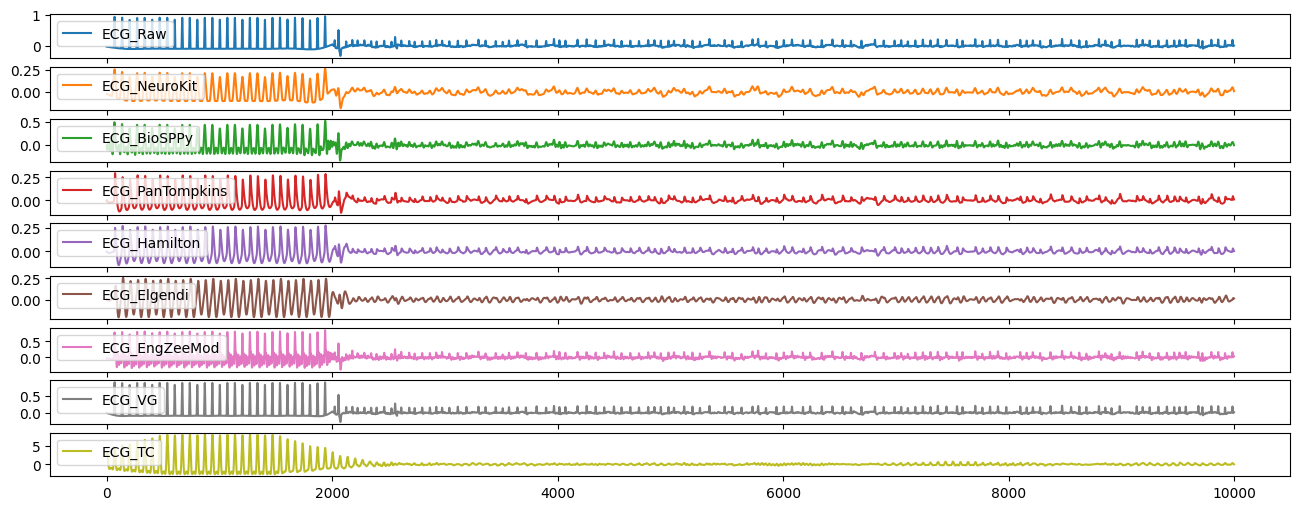

In [57]:
amostra = p_signal[0:10000,0]
ecg_x, _ = nk.ecg_process(amostra, sampling_rate= record.fs , method='neurokit') # Dividindo a tupla em DataFrame e Dicionário

signals = pd.DataFrame({
    "ECG_Raw" : ecg_x['ECG_Clean'],
    "ECG_NeuroKit" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="pantompkins1985"),
    "ECG_Hamilton" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="hamilton2002"),
    "ECG_Elgendi" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="elgendi2010"),
    "ECG_EngZeeMod" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="engzeemod2012"),
    "ECG_VG" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="vg"),
    "ECG_TC" : nk.ecg_clean(ecg_x['ECG_Clean'], sampling_rate=1000, method="templateconvolution")
})


signals.plot(subplots=True)

In [33]:
duplicadas = df_x.duplicated().sum()
print(f"O DataFrame tem {duplicadas} linhas duplicadas.")


O DataFrame tem 0 linhas duplicadas.


In [34]:
df_duplicadas = df_x[df_x.duplicated()]
print(df_duplicadas)


Empty DataFrame
Columns: [ECG_R_Peaks_mean, ECG_R_Peaks_std, ECG_R_Peaks_max, ECG_R_Peaks_min, ECG_R_Peaks_25%, ECG_R_Peaks_50%, ECG_R_Peaks_75%, ECG_P_Peaks_mean, ECG_P_Peaks_std, ECG_P_Peaks_max, ECG_P_Peaks_min, ECG_P_Peaks_25%, ECG_P_Peaks_50%, ECG_P_Peaks_75%, ECG_P_Onsets_mean, ECG_P_Onsets_std, ECG_P_Onsets_max, ECG_P_Onsets_min, ECG_P_Onsets_25%, ECG_P_Onsets_50%, ECG_P_Onsets_75%, ECG_P_Offsets_mean, ECG_P_Offsets_std, ECG_P_Offsets_max, ECG_P_Offsets_min, ECG_P_Offsets_25%, ECG_P_Offsets_50%, ECG_P_Offsets_75%, ECG_Q_Peaks_mean, ECG_Q_Peaks_std, ECG_Q_Peaks_max, ECG_Q_Peaks_min, ECG_Q_Peaks_25%, ECG_Q_Peaks_50%, ECG_Q_Peaks_75%, ECG_R_Onsets_mean, ECG_R_Onsets_std, ECG_R_Onsets_max, ECG_R_Onsets_min, ECG_R_Onsets_25%, ECG_R_Onsets_50%, ECG_R_Onsets_75%, ECG_R_Offsets_mean, ECG_R_Offsets_std, ECG_R_Offsets_max, ECG_R_Offsets_min, ECG_R_Offsets_25%, ECG_R_Offsets_50%, ECG_R_Offsets_75%, ECG_S_Peaks_mean, ECG_S_Peaks_std, ECG_S_Peaks_max, ECG_S_Peaks_min, ECG_S_Peaks_25%, ECG_S_

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU

def construir_rede_neural(X_train, X_test, y_train, y_test,input_dim):
    # Criar modelo poderoso
    def criar_rede_neural(input_dim, num_classes):
        model = keras.Sequential([
        keras.Input(shape=(input_dim,)),  # Corrigindo a entrada
        Dense(512),
        LeakyReLU(negative_slope=0.1),  # Corrigindo o parâmetro alpha
        BatchNormalization(),
        Dropout(0.3),

        Dense(256),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])



        # Compilar modelo
        model.compile(
            optimizer=Adam(learning_rate=0.001),  # Adam já é otimizado para deep learning
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model

    # Criar callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10)


    # Criar e treinar o modelo
    modelo = criar_rede_neural(input_dim=input_dim, num_classes=4)
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # Define para 0 para ocultar a saída
        #verbose=2  # Apenas mostra os valores das métricas
    )

    # Avaliação
    loss, acc = modelo.evaluate(X_test, y_test)
    print(f"\nAcurácia no conjunto de validação: {acc:.4f}")


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
import time


def tratamento_dados(dados):
    """
    Função para tratar os dados, realizando pré-processamento sem filtro específico.

    Parâmetros:
    - dados (DataFrame): O dataset a ser tratado.

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Separar as features (X) e o target (y)
    X = dados.drop(columns=['target_x']).values  # Remove a coluna target e pega as features
    y = dados['target_x'].values  # Mantém apenas a coluna target

    # Transformar os rótulos usando LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Verificar o mapeamento dos rótulos
    print("Rótulos originais:", np.unique(y))
    print("Rótulos transformados:", np.unique(y_encoded))

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter o target para one-hot encoding se for multiclasse
    num_classes = len(np.unique(y_encoded))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [82]:
# Renomear colunas (exceto id_paciente) para evitar conflito de nomes
df_x = df_x.rename(columns={col: col + "_x" for col in df_x.columns if col != "id_paciente"})
df_y = df_y.rename(columns={col: col + "_y" for col in df_y.columns if col != "id_paciente"})
df_z = df_z.rename(columns={col: col + "_z" for col in df_z.columns if col != "id_paciente"})

In [59]:
df_z.head(3)

,ECG_R_Peaks_mean_z,ECG_R_Peaks_std_z,ECG_R_Peaks_max_z,ECG_R_Peaks_min_z,ECG_R_Peaks_25%_z,ECG_R_Peaks_50%_z,ECG_R_Peaks_75%_z,ECG_P_Peaks_mean_z,ECG_P_Peaks_std_z,ECG_P_Peaks_max_z,...,ECG_Phase_Ventricular_75%_z,ECG_Phase_Completion_Ventricular_mean_z,ECG_Phase_Completion_Ventricular_std_z,ECG_Phase_Completion_Ventricular_max_z,ECG_Phase_Completion_Ventricular_min_z,ECG_Phase_Completion_Ventricular_25%_z,ECG_Phase_Completion_Ventricular_50%_z,ECG_Phase_Completion_Ventricular_75%_z,target_z,id_paciente
0,0.096881,0.150763,1.029458,-0.361264,0.027582,0.077418,0.127397,0.081956,0.122837,1.028626,...,0.062542,0.038271,0.112802,0.499479,-0.361804,-0.028050,0.027882,0.097694,0,P0001
1,0.273091,0.223777,0.670981,-0.503420,0.191762,0.209611,0.299270,0.308463,0.187187,0.689866,...,0.124999,0.149839,0.206810,0.669463,-0.565746,0.065394,0.104346,0.207822,0,P0002
2,0.164405,0.205228,0.676008,-0.146107,0.037967,0.113070,0.223329,0.149455,0.177313,0.655977,...,0.074296,0.067558,0.179252,0.675874,-0.233578,-0.037736,0.026124,0.117801,0,P0003


In [83]:

# colunas = ['mean', 'std', 'max', 'min', '75', '25', '50'] desativado 

# Meio simples de fazer mais um pouco errado pois estou fazendo por pocisão de colunas como o df_x df_y df_z tem as colunas iguais em relação a nome vou usar esse método porém o certo é pegar as colunas filtrar ou fazer um merge para concatenar média std ...
for col in range(df_x.shape[1]):
    #print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo


    #target = df_x['target']
    df_combinado = pd.concat([df_x.iloc[:,col], df_y.iloc[:,col], df_z.iloc[:,col],df_x['target_x']], axis=1)
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_combinado)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7617 - loss: 0.7636

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 17.79 segundos
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7617 - loss: 0.7864 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 15.30 segundos
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7579 - loss: 0.8059

Acurácia no conjunto de validação: 0.7683
Finalizando o processo - Tempo de execução: 14.69 segundos
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7617 - loss: 0.7733 

Acurácia no conjunto de validação: 0.7744
Finalizando o processo - Tempo de execução: 13.00 segundos
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1

ValueError: y should be a 1d array, got an array of shape (817, 2) instead.

In [70]:
df_x.shape[1]

107

In [55]:
df_x['target_x']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      3
8      0
9      0
10     6
11     3
12     0
13     0
14     0
15     3
16     0
17     3
18     0
19     0
20     0
21     0
22     0
23     0
24     6
25     3
26     0
27     7
28     6
29     0
30     0
31     6
32     6
33     0
34     0
35     0
36     0
37     7
38     0
39     0
40     3
41     0
42     0
43     6
44     0
45     3
46     0
47     3
48     0
49     3
50     6
51     0
52     6
53     3
54     3
55     0
56     0
57     0
58     0
59     0
60     6
61     7
62     0
63     0
64     0
65     0
66     3
67     0
68     0
69     0
70     0
71     6
72     3
73     0
74     0
75     6
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     6
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     6
98     0
99     0
100    0
101    3
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1